In [1]:
import sys

from pathlib import Path
from datetime import timedelta

import dateutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import trange




```
`# This is formatted as code`
```

#Import the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#  for all files read
TRAIN_DATASET = sorted([x for x in Path('/content/drive/MyDrive/IDS dataset/Dataset-20221107T085749Z-001/Dataset/train_dataset').glob("*.csv")])
TRAIN_DATASET

[PosixPath('/content/drive/MyDrive/IDS dataset/Dataset-20221107T085749Z-001/Dataset/train_dataset/train1.csv'),
 PosixPath('/content/drive/MyDrive/IDS dataset/Dataset-20221107T085749Z-001/Dataset/train_dataset/train2.csv')]

In [4]:
# TEST_DATASET = sorted([x for x in Path('/content/drive/MyDrive/Work in ICLR/Intrusion Detection system/Dataset/test_dataset').glob("*.csv")])
# TEST_DATASET

In [5]:
def dataframe_from_csv(target):
    return pd.read_csv(target).rename(columns=lambda x: x.strip())


def dataframe_from_csvs(targets):
    return pd.concat([dataframe_from_csv(x) for x in targets])

In [6]:
TRAIN_DF_RAW = dataframe_from_csvs(TRAIN_DATASET)
TRAIN_DF_RAW

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0000,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0,0,0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0000,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0,0,0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0000,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0,0,0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0000,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0,0,0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0000,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241195,2019-11-04 14:59:55,0.1001,1.5194,395.3508,1120.8154,29.4139,0.0,33.9638,33.4685,0.0,...,-0.0007,366.9524,362.7749,0.0000,10026.0,27548.0,0,0,0,0
241196,2019-11-04 14:59:56,0.1001,1.5220,395.3508,1120.8154,29.4139,0.0,35.9501,33.4723,0.0,...,-0.0007,365.7950,363.7876,0.0000,10026.0,27549.0,0,0,0,0
241197,2019-11-04 14:59:57,0.1001,1.5235,395.3508,1120.8154,29.4139,0.0,36.9430,33.4833,0.0,...,-0.0003,367.0790,364.0950,0.0000,10026.0,27547.0,0,0,0,0
241198,2019-11-04 14:59:58,0.1001,1.5279,395.3508,1120.8154,29.4139,0.0,35.9501,33.4837,0.0,...,0.0008,367.5492,364.5110,0.0000,10026.0,27551.0,0,0,0,0


In [7]:
# dataset info
TRAIN_DF_RAW.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
count,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,...,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,550800.000000,550800.0,550800.0
mean,0.082893,1.196657,406.525602,1087.704990,31.937685,41.455473,1267.102818,35.680649,34.597484,34.510035,...,-0.000027,330.033738,330.285906,21.225814,9995.640136,27611.045372,0.001409,0.001409,0.0,0.0
std,0.029830,0.183523,18.828682,27.888709,0.306622,41.060964,1210.146574,0.424571,38.477829,38.693999,...,0.002029,34.393849,30.835491,24.703344,39.172547,28.337949,0.037508,0.037508,0.0,0.0
min,0.029300,0.100179,392.306900,983.115200,29.413900,0.000000,19.067300,32.325200,0.000000,0.253300,...,-0.051300,229.817700,233.687800,0.000000,9833.000000,15203.000000,0.000000,0.000000,0.0,0.0
25%,0.098000,1.057900,395.627100,1083.680700,32.000000,0.262200,36.943000,35.522100,4.509675,4.434200,...,-0.001300,306.911900,312.500000,0.000000,9973.000000,27599.000000,0.000000,0.000000,0.0,0.0
50%,0.098900,1.158300,400.057000,1094.037800,32.000000,26.354800,860.046500,35.728800,15.851500,15.588400,...,-0.000100,330.891900,330.494000,0.000000,9998.000000,27623.000000,0.000000,0.000000,0.0,0.0
75%,0.100600,1.344000,406.061300,1102.893900,32.000000,91.447400,2846.744600,35.918800,70.589475,70.764200,...,0.001200,353.551800,349.103000,49.799800,10026.000000,27629.000000,0.000000,0.000000,0.0,0.0
max,0.101900,2.112192,467.296500,1120.815400,32.367300,100.000000,2894.898400,36.891100,100.000000,100.991800,...,0.054200,426.486600,420.175000,51.467000,10330.000000,27630.000000,1.000000,1.000000,0.0,0.0


In [8]:
print('Number of Rows (Samples): %s' % str((TRAIN_DF_RAW.shape[0])))
print('Number of Columns (Features): %s' % str((TRAIN_DF_RAW.shape[1])))

Number of Rows (Samples): 550800
Number of Columns (Features): 64


In [9]:
TRAIN_DF_RAW.columns

Index(['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002',
       'P1_B4005', 'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z',
       'P1_FCV02D', 'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01',
       'P1_FT01Z', 'P1_FT02', 'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D',
       'P1_LCV01Z', 'P1_LIT01', 'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D',
       'P1_PCV02Z', 'P1_PIT01', 'P1_PIT02', 'P1_TIT01', 'P1_TIT02', 'P2_24Vdc',
       'P2_Auto', 'P2_Emgy', 'P2_On', 'P2_SD01', 'P2_SIT01', 'P2_TripEx',
       'P2_VT01e', 'P2_VXT02', 'P2_VXT03', 'P2_VYT02', 'P2_VYT03', 'P3_LCP01D',
       'P3_LCV01D', 'P3_LH', 'P3_LL', 'P3_LT01', 'P4_HT_FD', 'P4_HT_LD',
       'P4_HT_PO', 'P4_HT_PS', 'P4_LD', 'P4_ST_FD', 'P4_ST_LD', 'P4_ST_PO',
       'P4_ST_PS', 'P4_ST_PT01', 'P4_ST_TT01', 'attack', 'attack_P1',
       'attack_P2', 'attack_P3'],
      dtype='object')

#Preprocessing

In [10]:
 #check for some null or missing values in our dataset
TRAIN_DF_RAW.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
TRAIN_DF_RAW.isnull()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
241196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
241197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
241198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


There is a field that indicates the time of day, time, and a field that indicates whether or not an attack was made (fields that start with attack). All other fields are values ​​from the sensor/actuator. Normalization should only target the sensor/actuator field.

"attack_P1", "attack_P2", and "attack_P3" specified as USELESS_FIELD below are fields representing attacks by each process (P1, P2, P3) in the HAI dataset. In this document, we only use the "attack" field and do not use process-specific attack information, as anomalies are detected against the entire data.

VALID_COLUMNS_IN_TRAIN_DATASET contains all sensor/actuator fields in the training dataset. Occasionally, fields that do not exist in the training dataset exist in the test dataset. Field names were obtained based on the training dataset because it was not possible to test for fields that were not seen during training

In [12]:
# uesless the (field p1,p2p,p3)

TIMESTAMP_FIELD = "time"
ATTACK_FIELD = "attack"
USELESS_FIELDS = ["attack_P1", "attack_P2", "attack_P3"]
VALID_COLUMNS_IN_TRAIN_DATASET = TRAIN_DF_RAW.columns.drop(
    [TIMESTAMP_FIELD, ATTACK_FIELD] + USELESS_FIELDS
)
VALID_COLUMNS_IN_TRAIN_DATASET

Index(['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_B4005',
       'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D',
       'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02',
       'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01',
       'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01',
       'P1_PIT02', 'P1_TIT01', 'P1_TIT02', 'P2_24Vdc', 'P2_Auto', 'P2_Emgy',
       'P2_On', 'P2_SD01', 'P2_SIT01', 'P2_TripEx', 'P2_VT01e', 'P2_VXT02',
       'P2_VXT03', 'P2_VYT02', 'P2_VYT03', 'P3_LCP01D', 'P3_LCV01D', 'P3_LH',
       'P3_LL', 'P3_LT01', 'P4_HT_FD', 'P4_HT_LD', 'P4_HT_PO', 'P4_HT_PS',
       'P4_LD', 'P4_ST_FD', 'P4_ST_LD', 'P4_ST_PO', 'P4_ST_PS', 'P4_ST_PT01',
       'P4_ST_TT01'],
      dtype='object')

TAG_MIN and TAG_MAX are the results of obtaining the minimum and maximum values ​​from the training dataset.



In [13]:
TAG_MIN = TRAIN_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET].min()
TAG_MAX = TRAIN_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET].max()


The normalize function normalizes the Dataframe. The normalization method is to use the minimum and maximum values ​​so that they fall within the range of 0 to 1.

Sometimes there are fields whose values ​​do not change at all. In this case, the minimum and maximum values ​​will be the same. In this article, we have made all of these fields zero.

In [14]:
def normalize(df):
    ndf = df.copy()
    for c in df.columns:
        if TAG_MIN[c] == TAG_MAX[c]:
            ndf[c] = df[c] - TAG_MIN[c]
        else:
            ndf[c] = (df[c] - TAG_MIN[c]) / (TAG_MAX[c] - TAG_MIN[c])
    return ndf

TRAIN_DF is the result of passing the exponential weighted function after normalization. It was applied in anticipation of smoothing the noise generated by the sensor.



In [15]:
TRAIN_DF = normalize(TRAIN_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()
TRAIN_DF

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_LD,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01
0,0.950413,0.482115,0.092349,0.924352,0.875635,0.0,0.003453,0.747782,0.0,0.000303,...,0.774283,0.695151,0.0,0.611301,0.482464,0.512735,0.510764,0.990676,0.28169,0.999920
1,0.950413,0.481979,0.092349,0.924352,0.875635,0.0,0.003767,0.747643,0.0,0.000303,...,0.777126,0.701872,0.0,0.622405,0.475571,0.510729,0.512880,0.990676,0.28169,0.999920
2,0.950413,0.482146,0.092349,0.924352,0.875635,0.0,0.002862,0.747848,0.0,0.000371,...,0.779809,0.710901,0.0,0.621954,0.500568,0.518915,0.514905,0.990676,0.28169,0.999920
3,0.950413,0.482878,0.092349,0.924352,0.875635,0.0,0.004637,0.748913,0.0,0.000242,...,0.782420,0.717861,0.0,0.624446,0.515840,0.517326,0.521391,0.990676,0.28169,0.999920
4,0.950413,0.482549,0.092349,0.924352,0.875635,0.0,0.004193,0.748428,0.0,0.000297,...,0.785652,0.723841,0.0,0.633393,0.502010,0.524698,0.522562,0.990676,0.28169,0.999920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241195,0.975207,0.704943,0.040591,1.000000,0.000000,0.0,0.005161,0.250210,0.0,0.000075,...,0.877609,0.867004,0.0,0.778027,0.480090,0.697501,0.692088,0.000000,0.38833,0.993434
241196,0.975207,0.706494,0.040591,1.000000,0.000000,0.0,0.005800,0.251130,0.0,0.000075,...,0.878447,0.868500,0.0,0.784467,0.479668,0.692012,0.697079,0.000000,0.38833,0.993477
241197,0.975207,0.707320,0.040591,1.000000,0.000000,0.0,0.006174,0.253390,0.0,0.000075,...,0.879079,0.869432,0.0,0.780943,0.483038,0.697339,0.699062,0.000000,0.38833,0.993337
241198,0.975207,0.709370,0.040591,1.000000,0.000000,0.0,0.005901,0.253695,0.0,0.000075,...,0.879611,0.870701,0.0,0.780168,0.492759,0.700023,0.701268,0.000000,0.38833,0.993612


In [16]:
import pandas as pd

In [ ]:
TRAIN_DF.plot(kind='barh')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def bar_graph(VALID_COLUMNS_IN_TRAIN_DATASET):
    TRAIN_DF[VALID_COLUMNS_IN_TRAIN_DATASET].value_counts().plot(kind="bar")

In [ ]:
# plt.figure(figsize=(15,3))
# bar_graph('P1_B2016')

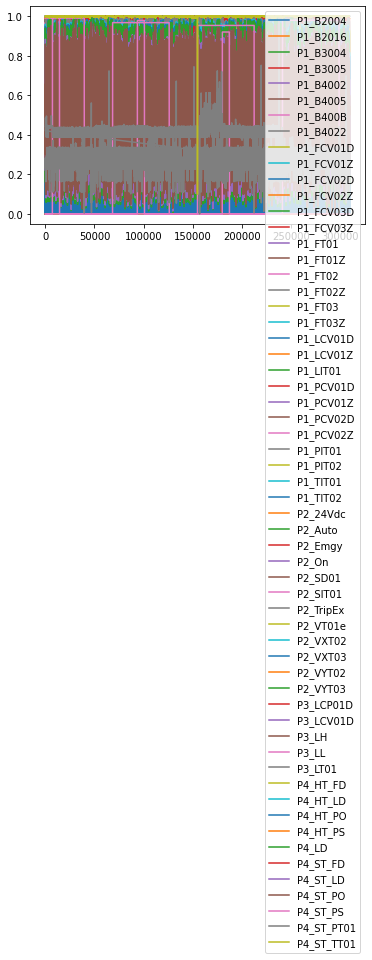

In [19]:
TRAIN_DF.plot()

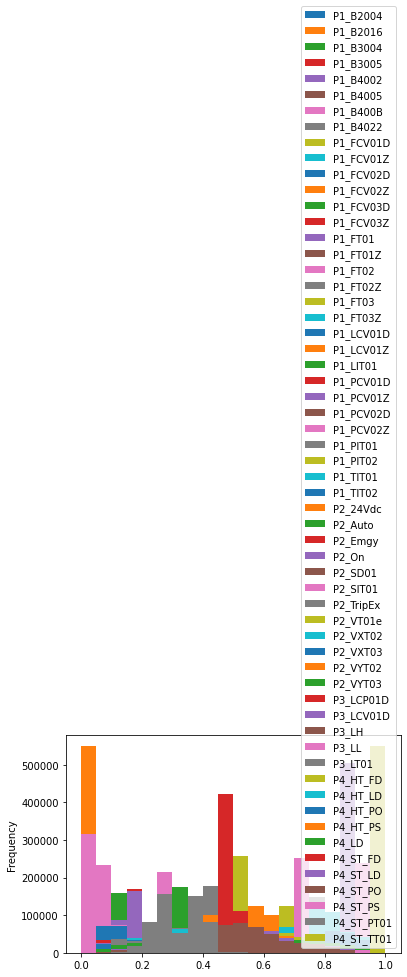

In [ ]:
df=pd.DataFrame(TRAIN_DF)
df.plot(kind='hist',bins=20)

# Distribution graphs (histogram/bar graph) of column data|

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(TRAIN_DF, nGraphShown, nGraphPerRow):
    nunique = TRAIN_DF.nunique()
    TRAIN_DF = TRAIN_DF[[col for col in TRAIN_DF if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = TRAIN_DF.shape
    columnNames = list(TRAIN_DF)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = TRAIN_DF.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    


In [ ]:
plotPerColumnDistribution(TRAIN_DF, 10, 5)

<Figure size 2400x512 with 0 Axes>

# Correlation matrix

In [ ]:
import matplotlib.pyplot as plt

def plot_correlation_matrix(TRAIN_DF):
    """Takes a pandas dataframe as input"""
    fig, ax = plt.subplots(nrows=10, ncols=20)
    
    cax = ax.matshow(TRAIN_DF)

    ticks = list(range(len(TRAIN_DF.columns)))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xticklabels(TRAIN_DF.columns, rotation=20, horizontalalignment='left')
    ax.set_yticklabels(TRAIN_DF.columns)

    plt.tight_layout()
    plt.show()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Using Pearson Correlation
# plt.figure(figsize=(12,10))
# cor = TRAIN_DF
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [ ]:
# # Increase the size of the heatmap.
# plt.figure(figsize=(10, 6))
# # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
# heatmap = sns.heatmap(TRAIN_DF, annot=True)
# # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=9);

# Scatter and density plots


In [ ]:
def plotScatterMatrix(TRAIN_DF, plotSize, textSize):
    TRAIN_DF = TRAIN_DF.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    TRAIN_DF = TRAIN_DF.dropna('columns')
    TRAIN_DF = TRAIN_DF[[col for col in TRAIN_DF if TRAIN_DF[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(TRAIN_DF)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    TRAIN_DF = TRAIN_DF[columnNames]
    ax = pd.plotting.scatter_matrix(TRAIN_DF, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = TRAIN_DF.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


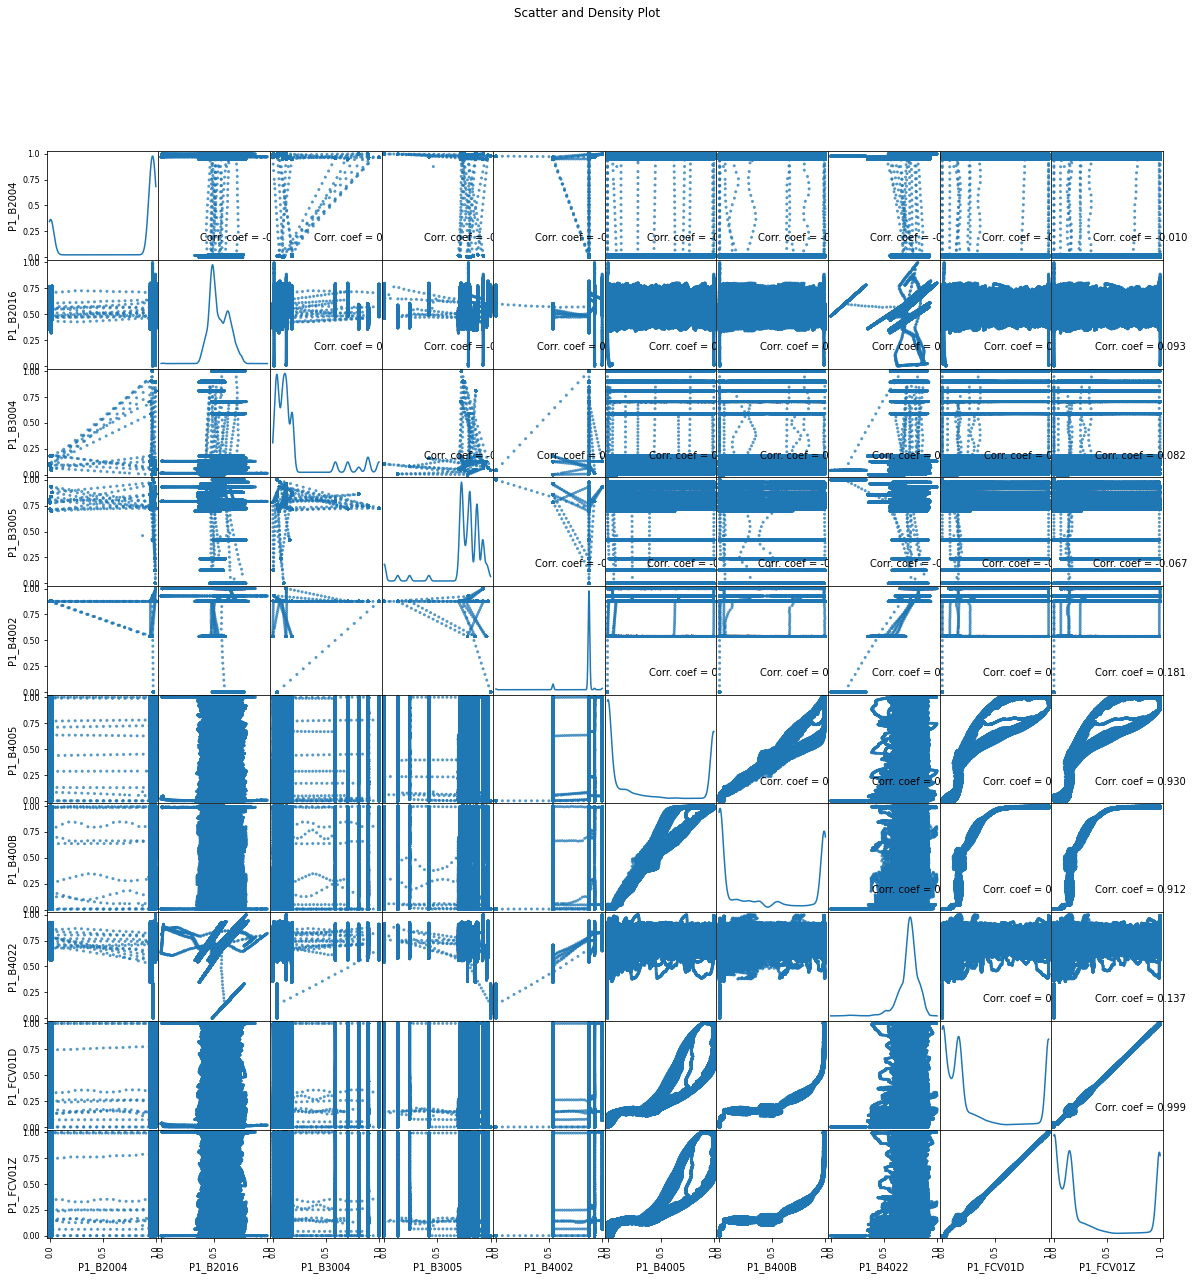

In [ ]:
plotScatterMatrix(TRAIN_DF, 20, 10)

The boundary_check function checks if any of the values ​​in the Pandas Dataframe are greater than 1, less than 0, or NaN.



In [ ]:
def boundary_check(df):
    x = np.array(df, dtype=np.float32)
    return np.any(x > 1.0), np.any(x < 0), np.any(np.isnan(x))


In [ ]:
boundary_check(TRAIN_DF)


(False, False, False)

In [ ]:
TRAIN_DF.keys()

Index(['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_B4005',
       'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D',
       'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02',
       'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01',
       'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01',
       'P1_PIT02', 'P1_TIT01', 'P1_TIT02', 'P2_24Vdc', 'P2_Auto', 'P2_Emgy',
       'P2_On', 'P2_SD01', 'P2_SIT01', 'P2_TripEx', 'P2_VT01e', 'P2_VXT02',
       'P2_VXT03', 'P2_VYT02', 'P2_VYT03', 'P3_LCP01D', 'P3_LCV01D', 'P3_LH',
       'P3_LL', 'P3_LT01', 'P4_HT_FD', 'P4_HT_LD', 'P4_HT_PO', 'P4_HT_PS',
       'P4_LD', 'P4_ST_FD', 'P4_ST_LD', 'P4_ST_PO', 'P4_ST_PS', 'P4_ST_PT01',
       'P4_ST_TT01'],
      dtype='object')

#PCA

In [1]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(TRAIN_DF)
scaled_data = scaler.transform(TRAIN_DF)

NameError: ignored

In [ ]:
# !pip3 install -U scikit-learn scipy matplotlib

#from sklearn.decomposition import PCA

used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca.fit(scaled_data)
scaled_data = scaler.transform(TRAIN_DF)

Now transform this data to its first 25 PC

In [ ]:
x_pca = pca.transform(scaled_data)
print(scaled_data)
print(x_pca.shape)


[[ 0.51649574 -0.68908438 -0.38736204 ...  1.20475374 -0.57815541
   0.65515755]
 [ 0.51649574 -0.69057052 -0.38736204 ...  1.20475374 -0.57815541
   0.65515755]
 [ 0.51649574 -0.68874074 -0.38736204 ...  1.20475374 -0.57815541
   0.65515755]
 ...
 [ 0.57683716  1.78002244 -0.59350005 ... -0.85923368  0.7752928
  -2.32991392]
 [ 0.57683716  1.80250683 -0.59350005 ... -0.85923368  0.7752928
  -2.20492314]
 [ 0.57683716  1.80573613 -0.59350005 ... -0.85923368  0.7752928
  -2.15958338]]
(550800, 25)


In [ ]:
df=pd.DataFrame(x_pca)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-3.501069,-2.345616,-1.868624,1.150728,-0.259827,-0.438615,0.345351,-2.303177,-0.215588,-0.703976,...,0.780816,-0.625955,0.816824,-0.183214,0.033574,-0.086777,-0.048213,0.438953,-0.292732,-0.082454
1,-3.630720,-2.285446,-1.922630,1.116464,0.553645,0.902664,-1.772503,0.114746,-0.528095,-0.744322,...,0.844753,-0.643261,0.748252,-0.069408,-0.167180,0.086925,-0.044577,0.398041,-0.287337,-0.080140
2,-3.236535,-2.453370,-1.879868,1.137671,-0.635103,-0.729764,0.613911,-1.082589,-0.326111,-0.203610,...,0.991972,-0.771139,0.723921,-0.062951,0.215892,-0.212652,-0.047096,0.471595,-0.313877,-0.079982
3,-3.662518,-2.278238,-2.103409,1.241461,0.553588,0.568707,-1.335327,-1.022966,-0.111178,-0.018407,...,0.950605,-0.591439,0.821438,-0.153434,-0.272035,0.108321,-0.056019,0.280508,-0.283324,-0.094282
4,-3.148778,-2.489824,-1.955839,1.197171,-0.364311,-0.232958,-0.239758,0.302367,-0.486649,-0.086261,...,1.075385,-0.752428,0.740349,-0.082658,0.263882,-0.267034,-0.049715,0.439240,-0.319886,-0.048482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550795,3.339108,-4.603408,-0.903504,4.586252,0.743865,7.838956,3.993427,0.010825,-2.306072,0.587978,...,-0.422589,-0.394644,-0.399190,-0.039914,-0.362300,0.005063,0.085699,1.333203,0.952428,0.273193
550796,3.133236,-4.504657,-0.996340,4.619996,1.434378,8.650509,2.782679,0.146822,-2.206090,0.554609,...,-0.505155,-0.339069,-0.367794,-0.087310,-0.708068,0.281703,0.079598,1.206368,0.948670,0.258881
550797,2.935171,-4.416258,-1.106162,4.672903,1.599941,8.552649,3.080150,-1.597398,-1.927802,0.439799,...,-0.598884,-0.197280,-0.255842,-0.124418,-1.112028,0.564287,0.082383,1.074687,0.980028,0.277901
550798,3.050257,-4.501982,-1.096682,4.648318,0.886426,7.459881,4.656419,-2.844739,-1.780707,0.606799,...,-0.515529,-0.303548,-0.338787,-0.178561,-0.899624,0.366892,0.072395,1.147896,0.974737,0.266304


In [ ]:
# save into csv
df.to_csv('PCA.csv')

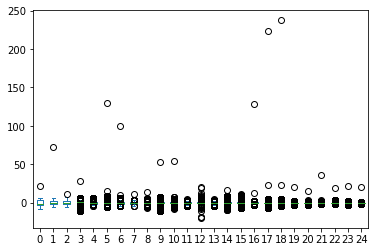

In [ ]:
df.plot(kind='box')

In [ ]:
# plt.figure(figsize=(8,6))
# plt.scatter(x_pca[:,0],x_pca[:,1],c=TRAIN_DF])
# plt.xlabel('First Principle Component')
# plt.ylabel('Second Principle Component')




NameError: ignored

In [ ]:
# df_comp = pd.DataFrame(pca.components_,columns=TRAIN_DF['P1_FCV01D'])
# plt.figure(figsize=(12,6))
# sns.heatmap(df_comp,camp='plasma',)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package BatchNormalization


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN , GRU , Activation
# from keras.layers.normalization import BatchNormalization
from keras import optimizers
import tensorflow as tf
from sklearn import preprocessing
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D

In [ ]:
x_train,Y_train=preprocessing(TRAIN_DF,cls='binary',df='TRAIN_DF')
# x_test,Y_test=preprocessing(test_data,cls='binary',df='test')

TypeError: ignored

In [ ]:
model = Sequential()

model.add(Convolution1D(32, 3, padding="same",activation="relu",input_shape = (x_pca.shape)))
# model.add(Convolution1D(32, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=(4)))
# model.add(tf.keras.layers.LayerNormalization())
# model.add(GRU(units = 128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.5))

model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))
# model.add(tf.keras.layers.LayerNormalization())

# model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
# model.add(AveragePooling1D(pool_size=(2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [ ]:
# tf.keras.optimizers.Adam(
#     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
# train_op = tf.keras.optimizers.adam(amsgrad=True)
model.compile(optimizer ='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit((x_pca, epochs = 10, batch_size = 128)

SyntaxError: ignored

We used PyTorch for deep learning training and inference.

The baseline model detects anomalies using stacked RNNs (GRU cells). We need to learn only normal data, and there are no labels in normal data, so we need to do unsupervised learning.

In this model, a part of the time series data is taken through a sliding window and the pattern of the window is memorized. The sliding window was set to 90 seconds (HAI is sampled every second).

The input and output of the model were set as follows.

Input: The value corresponding to the first 89 seconds of the window
Output: the value of the last second (90th second) of the window
In the subsequent detection, the difference between the value output by the model (predicted value) and the actual value was considered and if the difference was large, it was considered abnormal. The assumption that a lot of error occurs is because it is a pattern that has not been seen in the training dataset before.

Normalization worked fine. bcz there is no values greater 1 and less then 0 number



In [ ]:
# WINDOW_GIVEN = 89
# WINDOW_SIZE = 90


# class HaiDataset(Dataset):
#     def __init__(self, timestamps, df, stride=1, attacks=None):
#         self.ts = np.array(timestamps)
#         self.tag_values = np.array(df, dtype=np.float32)
#         self.valid_idxs = []
#         for L in trange(len(self.ts) - WINDOW_SIZE + 1):
#             R = L + WINDOW_SIZE - 1
#             if dateutil.parser.parse(self.ts[R]) - dateutil.parser.parse(
#                 self.ts[L]
#             ) == timedelta(seconds=WINDOW_SIZE - 1):
#                 self.valid_idxs.append(L)
#         self.valid_idxs = np.array(self.valid_idxs, dtype=np.int32)[::stride]
#         self.n_idxs = len(self.valid_idxs)
#         print(f"# of valid windows: {self.n_idxs}")
#         if attacks is not None:
#             self.attacks = np.array(attacks, dtype=np.float32)
#             self.with_attack = True
#         else:
#             self.with_attack = False

#     def __len__(self):
#         return self.n_idxs

#     def __getitem__(self, idx):
#         i = self.valid_idxs[idx]
#         last = i + WINDOW_SIZE - 1
#         item = {"attack": self.attacks[last]} if self.with_attack else {}
#         item["ts"] = self.ts[i + WINDOW_SIZE - 1]
#         item["given"] = torch.from_numpy(self.tag_values[i : i + WINDOW_GIVEN])
#         item["answer"] = torch.from_numpy(self.tag_values[last])
#         return item

The HaiDataset class defines PyTorch's Dataset interface.

When reading a dataset, we check that the sliding window is valid. In a normal window, the difference between the first time and the last time of the window should be 89 seconds.

The stride parameter means the size when sliding. It is possible to learn all the windows, but in time series data, if a sliding window is applied by 1 second, the values ​​of the previous window and the next window are almost the same. In this notebook, in order to finish training quickly, data was extracted by skipping 10 seconds. (Of course it would be better if you set the sliding size to 1 to see all datasets)

In [ ]:
# HAI_DATASET_TRAIN = HaiDataset(TRAIN_DF_RAW[TIMESTAMP_FIELD], TRAIN_DF, stride=10)
# HAI_DATASET_TRAIN[0]

You can see that the dataset loads fine.

The model uses a three-layer bidirectional GRU. The size of the hidden cell is set to 100. Dropout was not used.

I made a skip connection (see the return statement in the forward method) so that the model emits the first value of the window plus the output of the RNN.

In [ ]:
# N_HIDDENS = 100
# N_LAYERS = 3
# BATCH_SIZE = 512


# class StackedGRU(torch.nn.Module):
#     def __init__(self, n_tags):
#         super().__init__()
#         self.rnn = torch.nn.GRU(
#             input_size=n_tags,
#             hidden_size=N_HIDDENS,
#             num_layers=N_LAYERS,
#             bidirectional=True,
#             dropout=0,
#         )
#         self.fc = torch.nn.Linear(N_HIDDENS * 2, n_tags)

#     def forward(self, x):
#         x = x.transpose(0, 1)  # (batch, seq, params) -> (seq, batch, params)
#         self.rnn.flatten_parameters()
#         outs, _ = self.rnn(x)
#         out = self.fc(outs[-1])
#         return x[0] + out

In [ ]:
# MODEL = StackedGRU(n_tags=TRAIN_DF.shape[1])
# MODEL.cuda()

#new model training


If you want to train the model yourself, just run the code below.

If you want to load an already trained model and see only the results, go to the 'Import model' section below and continue the execution.

For the loss function, MSE was selected, and for the optimizer, AdamW (Loshchilov & Hutter, "Decoupled Weight Decay Regularization", ICLR 2019) was used.

Save the parameters of the model with the best epoch loss during training.

In [ ]:
# def train(dataset, model, batch_size, n_epochs):
#     dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
#     optimizer = torch.optim.AdamW(model.parameters())
#     loss_fn = torch.nn.MSELoss()
#     epochs = trange(n_epochs, desc="training")
#     best = {"loss": sys.float_info.max}
#     loss_history = []
#     for e in epochs:
#         epoch_loss = 0
#         for batch in dataloader:
#             optimizer.zero_grad()
#             given = batch["given"].cuda()
#             guess = model(given)
#             answer = batch["answer"].cuda()
#             loss = loss_fn(answer, guess)
#             loss.backward()
#             epoch_loss += loss.item()
#             optimizer.step()
#         loss_history.append(epoch_loss)
#         epochs.set_postfix_str(f"loss: {epoch_loss:.6f}")
#         if epoch_loss < best["loss"]:
#             best["state"] = model.state_dict()
#             best["loss"] = epoch_loss
#             best["epoch"] = e + 1
#     return best, loss_history

Learning proceeded for 32 epochs.



In [ ]:
# MODEL.train()
# BEST_MODEL, LOSS_HISTORY = train(HAI_DATASET_TRAIN, MODEL, BATCH_SIZE, 32)

In [ ]:
# BEST_MODEL["loss"], BEST_MODEL["epoch"]


In [ ]:
# with open("model.pt", "wb") as f:
#     torch.save(
#         {
#             "state": BEST_MODEL["state"],
#             "best_epoch": BEST_MODEL["epoch"],
#             "loss_history": LOSS_HISTORY,
#         },
#         f,
#     )

#Import model


Load the already trained model parameters and training loss records.



> Indented block



In [ ]:
# with open("model.pt", "rb") as f:
#     SAVED_MODEL = torch.load(f)

# MODEL.load_state_dict(SAVED_MODEL["state"])

In [ ]:
# plt.figure(figsize=(16, 4))
# plt.title("Training Loss Graph")
# plt.xlabel("epochs")
# plt.ylabel("loss")
# plt.yscale("log")
# plt.plot(SAVED_MODEL["loss_history"])
# plt.show()